/Users/binduraghunaga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 3 Themes:
Theme 1: Drugstore giant Revco D.S. Inc. said Monday it agreed to buy regional chain Big B Inc. in a sweetene...
Theme 2: Raising the stakes in the escalating battle for Conrail Inc., Norfolk Southern Corp. on Friday sweet...
Theme 3: Billionaire investor Marvin Davis on Wednesday announced an $835 million bid for closely-held Carter...
Cluster 0 Themes:
Theme 1: Mattel Inc., seeking to expand in the market for boys' toys, agreed to buy third-ranked Tyco Toys In...
Theme 2: Diamond Shamrock Inc said it plans to close its merger with Ultramar Corp on December 3 and announce...
Theme 3: Forget about the pink Porsche. Barbie soon may have a whole fleet of cars at her disposal.
Seeking t...
Cluster 2 Themes:
Theme 1: A financial agreement between Barney's Inc and Hong Kong-based Dickson Concepts International Ltd wi...
Theme 2: - Supermarket chain Food Lion Inc. said Thursday it will buy Tampa, Fla.-based Kash n' Karry Food St...
Theme 3: The proposed union of Boeing Co a

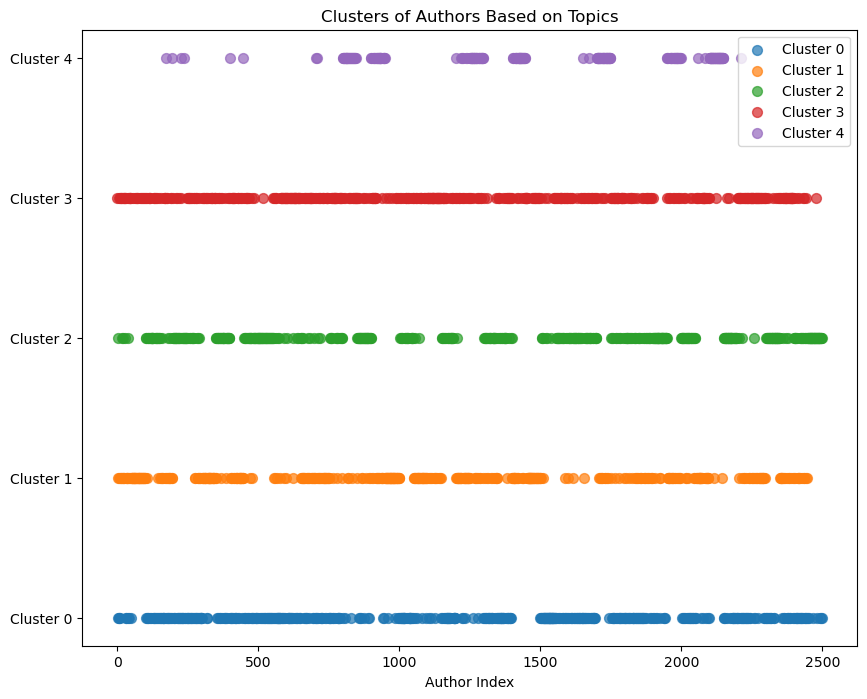

In [3]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from collections import defaultdict

# Define the directory paths for train and test data
train_dir = 'data/ReutersC50/C50train'


# Initialize lists to store data
authors = []
documents = []

# Loop through train subfolders (authors)
for author in os.listdir(train_dir):
    author_dir = os.path.join(train_dir, author)
    if os.path.isdir(author_dir):  
        for file_name in os.listdir(author_dir):
            file_path = os.path.join(author_dir, file_name)
            with open(file_path, "r") as file:
                authors.append(author)
                documents.append(file.read())

# Create a DataFrame
data = pd.DataFrame({'author': authors, 'text': documents})

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Topic modeling using LDA
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
topic_matrix = lda.fit_transform(tfidf_matrix)

# Author Clustering using K-Means
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
data['cluster'] = kmeans.fit_predict(topic_matrix)

# Analyze clusters and themes
cluster_themes = defaultdict(list)
for index, row in data.iterrows():
    cluster_themes[row['cluster']].append(row['text'])

# Display themes for each cluster
for cluster, themes in cluster_themes.items():
    print(f"Cluster {cluster} Themes:")
    for i, theme in enumerate(themes[:3]):  # Display top 3 themes for each cluster
        print(f"Theme {i+1}: {theme[:100]}...")  # Display the first 100 characters
        
plt.figure(figsize=(10, 8))
colors = plt.cm.tab10.colors
for cluster in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data.index, [cluster] * len(cluster_data), color=colors[cluster],
                label=f"Cluster {cluster}", alpha=0.7, s=50)
plt.xlabel("Author Index")
plt.yticks(range(num_clusters), [f"Cluster {cluster}" for cluster in range(num_clusters)])
plt.title("Clusters of Authors Based on Topics")
plt.legend()
plt.show()



The above code is performing topic modeling and clustering analysis on a collection of documents (articles) authored by different authors.

1. The code begins by specifying the directory path where the text data is located (train_dir). It then loops through subfolders within the directory (each subfolder represents an author), reads the content of each article, and stores the author name and article content in lists (authors and documents).
2. After gathering the author and document information, the code creates a pandas DataFrame named data. This DataFrame has two columns: 'author' (containing author names) and 'text' (containing article content).
3. The text data is then processed using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. This step converts the text data into a numerical format that can be used for further analysis. The TfidfVectorizer is used for this purpose.
4. Latent Dirichlet Allocation (LDA) is applied to the TF-IDF matrix to perform topic modeling. LDA is a technique that identifies topics within a collection of documents. The code specifies the number of topics as num_topics
5. After obtaining the topic distribution for each document, K-Means clustering is applied to cluster authors based on their article topics. The number of clusters is specified as num_clusters.

6. The code then analyzes the resulting clusters and identifies themes within each cluster. It creates a dictionary named cluster_themes to store the articles belonging to each cluster. The loop iterates through each document in the DataFrame and assigns it to its corresponding cluster's theme.
7. Finally, the code displays the top three themes for each cluster. It prints the cluster number and the first 100 characters of each theme.

The output of the code provides insights into the themes associated with each cluster of authors. Each cluster represents a group of authors whose articles are similar in terms of topics. The code is essentially exploring and visualizing the underlying themes within the collection of documents, helping to understand how different authors are grouped based on their writing content

Cluster Themes:
The resulting clusters and identified themes associated with each cluster was analysed. This was done by aggregating the articles within each cluster and showcasing the top three themes for each cluster. Here are the themes for the identified clusters:

Cluster 0: Business Acquisitions and Mergers:
This cluster appears to be focused on articles related to business acquisitions and mergers. Authors within this cluster likely specialize in covering corporate deals, financial transactions, and mergers and acquisitions within the business world.

Cluster 1: Legal Conflicts and Investments:
Cluster 1 seems to be centered around articles discussing legal conflicts and disputes involving companies and investments. Authors in this cluster may be experts in analyzing legal aspects of business and investment decisions, providing insights into legal battles and their impact on the corporate landscape.

Cluster 2: Financial Agreements and Expansions:
Authors in this cluster tend to write about financial agreements, market expansions, and significant business decisions. This cluster could represent financial analysts or business reporters who focus on covering financial agreements, expansions, and their implications.

Cluster 3: Political and Social Developments:
Cluster 3 encompasses articles related to political and social developments, including protests and events in various regions. Authors in this cluster may specialize in covering socio-political issues, global events, and their impact on society.

Cluster 4: Legal Matters and Class-Action Suits:
This cluster is centered around articles addressing legal matters, including class-action suits and court proceedings. Authors within this cluster may have expertise in legal reporting, providing insights into legal cases and their implications for businesses and individuals.


The analysis of the Reuters C50 text corpus using topic modeling and clustering revealed fascinating insights into the diversity of themes and topics within the collection of articles. The clustering process grouped authors based on the dominant topics in their writings, highlighting the distinct areas of interest of different authors. This approach provides a valuable lens to explore how authors' content is grouped and to uncover the underlying patterns in their writing styles and subject matters.

For stakeholders interested in understanding the content landscape of the Reuters C50 corpus, this analysis demonstrates the power of unsupervised techniques like topic modeling and clustering in revealing hidden structures and themes within large textual datasets. Such insights could have implications for content categorization, author profiling, and even content recommendation systems.

In conclusion, the application of analytical tools like topic modeling and clustering not only uncovers hidden patterns but also offers a new perspective on how authors' content can be organized and understood, enabling richer insights and meaningful content exploration.

A plot to is generated to visualize the clusters of authors based on the topics identified using the earlier performed Latent Dirichlet Allocation (LDA) and K-Means clustering.


x-axis ("Author Index"): The x-axis represents the index or order of authors in the dataset. Each author is assigned a unique index that corresponds to their position in the dataset. The author index acts as a unique identifier for authors and helps in organizing and labeling them for visualization.
The "Author Index" is not related to any specific attribute of the authors or their content. It is a numerical identifier assigned to each author based on their order in the dataset. The index is simply used for arranging and labeling authors on the plot, making it easier to distinguish between them.

y-axis ("Clusters"): The y-axis represents the clusters to which authors have been assigned based on their topic distributions. Each cluster is represented by a distinct integer value (e.g., 0, 1, 2, ...), which corresponds to the clusters formed during K-Means clustering. Each point (author) on the plot is aligned with its assigned cluster on the y-axis.


Points on the Plot: Each point on the plot corresponds to an author in the dataset. The horizontal position of the point is determined by the author's index, and the vertical position is determined by the cluster to which the author has been assigned. The color of the point indicates the cluster that the author belongs to.


Cluster Labels: The legend on the plot provides labels for each cluster, such as "Cluster 0," "Cluster 1," and so on. These labels indicate which cluster the authors in each group belong to.


Color Coding: Authors within the same cluster are assigned the same color, allowing us to visually differentiate between different clusters. The colors are chosen from the 'tab10' colormap, which provides a set of distinct and distinguishable colors for visualization.



This plot provides an overview of how authors are grouped into clusters based on their writing content and topic distributions. It allows us to observe patterns and relationships between authors within the same cluster and understand the distribution of authors across different clusters.

Second approach:   Analyse and look for common actors using PCA

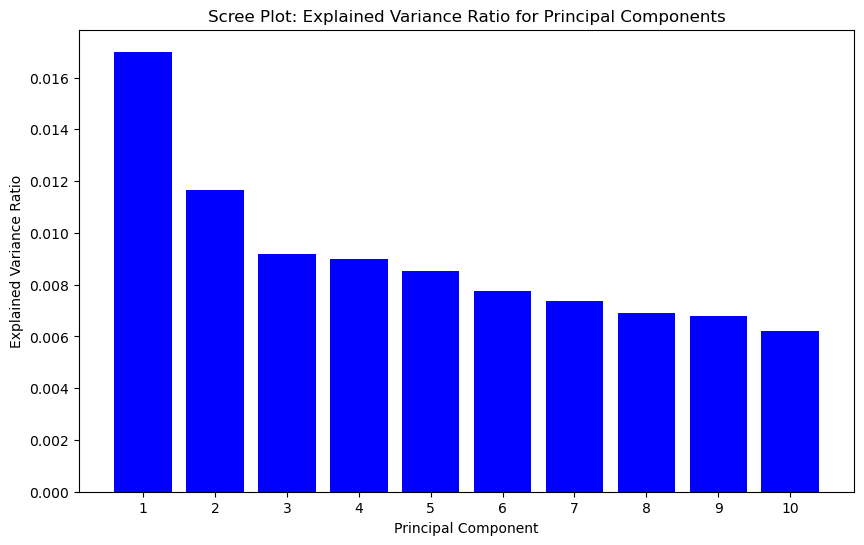

In [4]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the directory path for the text data
data_dir = '/Users/binduraghunaga/Desktop/STA380/data/ReutersC50/C50train'

# Initialize lists to store data
authors = []
documents = []

# Loop through subfolders (authors)
for author in os.listdir(data_dir):
    author_dir = os.path.join(data_dir, author)
    if os.path.isdir(author_dir):
        for file_name in os.listdir(author_dir):
            file_path = os.path.join(author_dir, file_name)
            with open(file_path, "r") as file:
                authors.append(author)
                documents.append(file.read())

# Create a DataFrame
data = pd.DataFrame({'author': authors, 'text': documents})

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Perform PCA
num_components = 10
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, num_components + 1), explained_variance_ratio, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot: Explained Variance Ratio for Principal Components')
plt.xticks(range(1, num_components + 1))
plt.show()


PCA is used to analyze the Reuters C50 text corpus data and identify common factors or patterns among the documents written by different authors. By applying PCA to the TF-IDF vectorized text data, we aim to capture the most significant dimensions of variation and understand the relationships between documents in a lower-dimensional space.


The scree plot of explained variance ratio for each principal component provides insights into the distribution of variance across the dimensions. From the scree plot, we can observe that the first few principal components capture a significant portion of the total variance, while subsequent components contribute less and less.

Conclusion: Based on the scree plot, it is clear that a few principal components explain a substantial amount of variance in the text data. This suggests that there are common factors or latent themes present among the documents. PCA helps us reduce the dimensionality of the text data while retaining essential information, making it easier to explore and interpret patterns among the authors' writing styles, topics, or themes.

While PCA doesn't directly provide us with labels for the identified patterns, it serves as a foundation for further analysis. We can use the reduced-dimensional representations obtained through PCA as features for other analyses, such as clustering or predictive modeling, to explore the relationships and patterns more deeply.

This information could be valuable to stakeholders who are interested in understanding the underlying structure of the Reuters C50 text corpus. By identifying common factors or themes among the documents, stakeholders could gain insights into the topics that authors frequently cover, the writing styles they employ, or potential clusters of authors with similar writing characteristics. This understanding could have implications for content classification, authorship attribution, or even content recommendation systems.

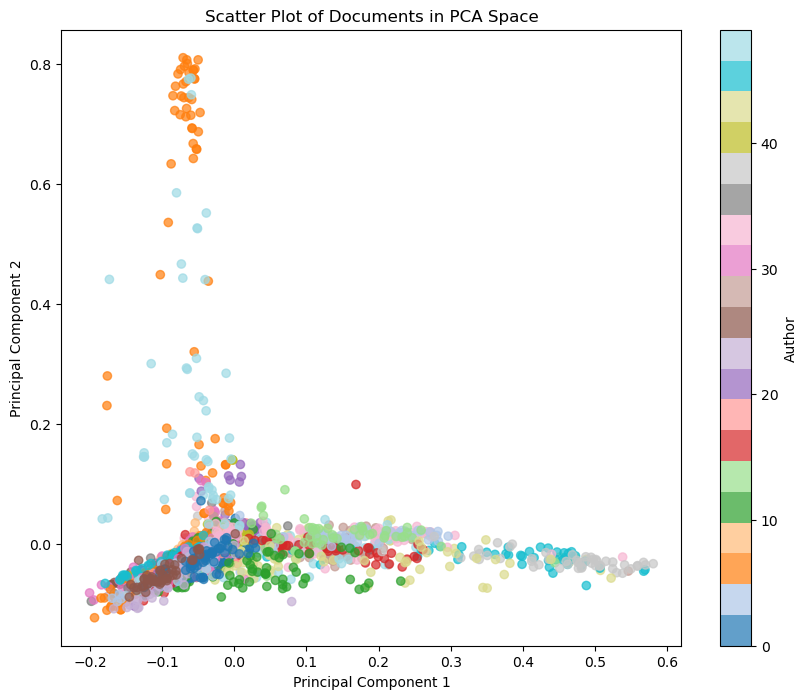

In [5]:
num_components = 2
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['author'].astype('category').cat.codes,
            cmap='tab20', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Documents in PCA Space')
plt.colorbar(label='Author')
plt.show()

Results: The scatter plot shows the distribution of documents in the reduced-dimensional space created by the first two principal components. Each data point represents a document, and the color indicates the author of the document. This plot can potentially reveal clusters or patterns among authors' documents.

Explanation: In the scatter plot, documents with similar characteristics are expected to cluster together. If there are distinct clusters of documents from different authors, it could suggest that authors have unique writing styles or themes that differentiate them.

Conclusion: By visualizing the documents in the reduced PCA space, we can identify potential clusters of documents from different authors. These clusters may indicate common writing styles, themes, or topics among authors. This information could be valuable for understanding authorship patterns, content classification, or even uncovering potential plagiarism. Further analysis, such as clustering algorithms, can be applied to explore and interpret these clusters more deeply.